In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer 


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
listing = pd.read_csv('listings.csv')

In [85]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 93 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3818 non-null object
space                               3818 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               3818 non-null object
notes                               3818 non-null object
transit                             3818 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

### Preprocess the text of the name column 

In [5]:
import re 
import string 

In [6]:
listing['summary'] = listing['summary'].fillna('No summary')

In [7]:
listing['space'] = listing.space.fillna('No description')

In [8]:
listing[['neighborhood_overview','notes','transit','host_response_time']] = listing[['neighborhood_overview','notes','transit','host_response_time']].fillna('No description')

In [9]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

In [10]:
listing['name'] = listing.name.map(alphanumeric).map(punc_lower)

In [11]:
listing['summary'] = listing.summary.map(alphanumeric).map(punc_lower)

In [12]:
listing['space'] = listing.space.map(alphanumeric).map(punc_lower)

In [13]:
listing['description'] = listing['description'].map(alphanumeric).map(punc_lower)

In [14]:
listing['neighborhood_overview'] = listing['neighborhood_overview'].map(alphanumeric).map(punc_lower)

In [15]:
listing['notes'] = listing['notes'].map(alphanumeric).map(punc_lower)

In [16]:
listing['transit'] = listing['transit'].map(alphanumeric).map(punc_lower)

In [17]:
listing['host_response_time'] = listing['host_response_time'].map(alphanumeric).map(punc_lower)

In [18]:
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleanin

In [6]:
listing[listing['id'] == 14453508]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month


In [20]:
listingdf = listing[['listing_url','name','summary','space','description','host_about','price']]

### Prepare data for modeling 

In [21]:
from sklearn import datasets
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics.pairwise import cosine_similarity


from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
%matplotlib inline

In [22]:
!pip install wordcloud

In [23]:
listing['content'] = listing[['name','summary','space','description','neighborhood_overview','notes','transit']].astype(str).apply(lambda x: ','.join(x),axis=1)

In [24]:
listing['content'].head()

0    stylish queen anne apartment,no summary,make y...
1    bright   airy queen anne apartment,chemically ...
2    new modern house amazing water view,new modern...
3    queen anne chateau,a charming apartment that s...
4    charming craftsman   bdm house,cozy family cra...
Name: content, dtype: object

In [25]:
vectorizer = CountVectorizer(stop_words='english',ngram_range=(1, 2))
doc_word = vectorizer.fit_transform(listing['content'])
doc_word.shape

(3818, 223150)

In [26]:
query = vectorizer.transform(['I want an apartment in queen anne with parking'])

In [27]:
### cosine similarity

In [28]:
print(cosine_similarity(query, doc_word))

[[0.27614296 0.17175652 0.23240052 ... 0.0249145  0.03803319 0.22356061]]


In [29]:
similarity = cosine_similarity(query, doc_word)

In [30]:
np.argsort(similarity[0])[-5:]

array([3154,  481, 3184, 3172, 3201])

In [31]:
np.argmax(similarity[0])

3201

In [32]:
listing.loc[3201]

id                                                                            7921289
listing_url                                      https://www.airbnb.com/rooms/7921289
scrape_id                                                              20160104002432
last_scraped                                                               2016-01-04
name                                              open   bedroom   balcony  city view
summary                             enjoy your own apartment on the top of queen a...
space                                      open one bedroom with a balcony and views 
description                         enjoy your own apartment on the top of queen a...
experiences_offered                                                              none
neighborhood_overview               this apartment is located on the top of queen ...
notes                                                                  no description
transit                             downtown is a   mi

### My function 

In [33]:
vectorizer = CountVectorizer(stop_words='english',ngram_range=(1, 2))
doc_word = vectorizer.fit_transform(listing['content'])
#lsa = TruncatedSVD(10)

#doc_topic = lsa.fit_transform(doc_word)

In [34]:
doc_word.shape

(3818, 223150)

In [35]:
def recommend_five():
    g = input('What are you interested in? ')
    query = vectorizer.transform([g])
    similarity = cosine_similarity(query, doc_word)
    nums = np.argsort(similarity[0])[-5:]
    return listingdf.loc[nums]

In [36]:
recommend_five()

What are you interested in? small apartmnent


,listing_url,name,summary,space,description,host_about,price
2108,https://www.airbnb.com/rooms/6793490,private little beaconhill house,cozy one bedroom little house has all you ne...,this is a bedroom bath fully furnished tw...,cozy one bedroom little house has all you ne...,"Hello , we enjoy hosting people from around th...",$69.00
3565,https://www.airbnb.com/rooms/7368959,cozy capital hill studio,this is a small cozy studio in the trendy c...,with a walk score it is close to the excitin...,this is a small cozy studio in the trendy c...,I was born and raised in Washington state and ...,$104.00
3359,https://www.airbnb.com/rooms/8611952,phinneywood bungalow,this historic home is perfect for a small fami...,this adorable beautifully decorated bungalo...,this historic home is perfect for a small fami...,Rental and Management company representing ove...,$195.00
1545,https://www.airbnb.com/rooms/3977605,vintage downtown seattle studio,this small studio is a perfect seattle hotel a...,please read this whole description for importa...,this small studio is a perfect seattle hotel a...,"We're a couple of laid-back, former Peace Corp...",$85.00
3292,https://www.airbnb.com/rooms/173896,studio suite with private entry,the detached studio is a delightful space loca...,the studio is attached to the garage with easy...,the detached studio is a delightful space loca...,Lori and I have lived in Seattle for over twen...,$70.00


### Saving into pickle 

In [29]:
import pickle 
pickle.dump(vectorizer,open('vectorizor.pkl','wb'))

In [31]:
pickle.dump(doc_word,open('doc_word.pkl','wb'))

In [32]:
pickle.dump(listingdf,open('df.pkl','wb'))

### Creating topics

In [50]:
df_full = pd.DataFrame(doc_word.toarray(), index=listing['content'], columns=vectorizer.get_feature_names()).head(10)

In [38]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(10)
doc_topic = lsa.fit_transform(doc_word)
lsa.explained_variance_ratio_

array([0.02203996, 0.02061193, 0.01415041, 0.01153844, 0.01063718,
       0.00903518, 0.00792318, 0.00744546, 0.00723848, 0.00682759])

In [39]:
doc_topic

array([[12.41389498,  0.31731061,  5.37610593, ...,  0.68131243,
         1.98709803,  2.23028419],
       [10.78231313,  0.40541849, -0.30300004, ..., -1.97688267,
         3.01980061,  3.06489324],
       [19.48268862, -5.90941074, -4.21888781, ..., -5.59654142,
         6.61512733,  0.07314962],
       ...,
       [ 2.82819647, -0.16200333,  0.317848  , ...,  0.61947324,
        -0.68273735, -0.08717955],
       [11.22815898,  2.11474219, -0.73642356, ..., -1.57524204,
         1.4143511 ,  0.80439272],
       [ 3.13387911, -0.11934823,  1.0687866 , ...,  0.58464396,
         0.66937275, -0.24442978]])

In [40]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["component_1","component_2",'component_3','component_4','component_5','component_6','component_7','component_8','component_9','component_10'],
             columns = vectorizer.get_feature_names())
topic_word

,aaa,aaa location,aaa travel,aaron,aaron wife,ab,ab easy,abba,abba urban,abbey,abbey arts,abbey concerts,abc,abc market,abc nbc,abc transport,abc transportation,abe,abe eli,abiance,abiance soul,abide,abide description,abiding,abiding signs,abig,abig tree,abilities,abilities bath,abilities extremely,ability,ability airport,ability building,ability currently,ability directly,ability fremont,ability home,ability rating,ability score,ability walk,able,able access,able accommadate,able accommodate,able accompany,able adjust,able afford,able answer,able arrange,able arriving,able assist,able away,able bedroom,able bicycles,able bodied,able book,able bring,able bus,able check,able climb,able come,able community,able connect,able cook,able dive,able drop,able easily,able enjoy,able experience,able friendly,able good,able gorgeous,able greet,able hang,able hear,able hearts,able help,able host,able hotel,able interact,able lend,able let,able line,able live,able location,able lock,able locked,able lovely,able maintain,able major,able make,able meet,able navigate,able need,able needed,able neighborhood,able neighborhoods,able night,able occasion,able offer,able park,able physically,able pick,able pizza,able plug,able provide,able relax,able reserved,able respond,able restaurants,able safely,able seattle,able secure,able share,able shopping,able sign,able space,able spot,able stay,able stop,able stretch,able studio,able supply,able tolerate,able units,able upload,able use,able vibrant,able walk,able walks,able warm,able watch,able wifi,able work,abnormally,abnormally large,abnormally small,aboard,aboard cable,aboard classic,aboard community,aboard guests,abode,abode artist,abode beautifully,abode close,abode day,abode explore,abode furnished,abode grandest,abode ideal,abode just,abode location,abode offers,abode remodeled,abode rules,abottom,abottom day,abou,abou cozy,abou located,abou walk,abound,abound beautiful,abound bon,abound cannabis,abound close,abound cozy,abound dramatic,abound established,abound favorites,abound feel,abound generally,abound great,abound guests,abound includes,abound kept,abound nearest,abound neighborhood,abound new,abound outside,abound patio,abound public,abound quiet,abound relax,abound sam,abound self,abound summer,abound sure,abound thumping,abound uber,abound west,abounds,abounds foodie,abounds includes,abounds lots,abounds love,abounds setting,abounds thrilled,abounds vacation,abroad,abroad actually,abroad days,abroad europe,abroad flat,abroad friends,abroad months,abroad work,absence,absence animal,absence bus,absence located,absolute,absolute best,absolute craftsman,absolute favorite,absolute favs,absolute quiet,absolute quietness,absolute requirement,absolute silence,absolute sweet,absolutely,absolutely access,absolutely amazing,absolutely available,absolutely beautiful,absolutely breathtaking,absolutely bring,absolutely buses,absolutely central,absolutely charming,absolutely easy,absolutely filled,absolutely friendliest,absolutely georgeous,absolutely home,absolutely immaculate,absolutely impossible,absolutely loud,absolutely love,absolutely noise,absolutely pets,absolutely place,absolutely problems,absolutely smoking,absolutely stock,absolutely stress,absolutely stunning,absolutely time,...,zoning,zoning passes,zoning restrictions,zoo,zoo absolute,zoo activities,zoo adults,zoo amenities,zoo apartment,zoo approx,zoo archie,zoo babirusa,zoo ballard,zoo bathhouse,zoo beautiful,zoo best,zoo bike,zoo block,zoo blocks,zoo boeing,zoo burke,zoo buses,zoo cafes,zoo carkeek,zoo central,zoo china,zoo chinatown,zoo city,zoo classically,zoo close,zoo coffee,zoo concerts,zoo couple,zoo description,zoo desirable,zoo dining,zoo discovery,zoo downtown,zoo easily,zoo easy,zoo enjoy,zoo equidistant,zoo fabulous,zoo far,zoo favorite,zoo finish,zoo follow,zoo fremont,zoo fun,zoo funky,zoo gasworks,zoo getting,zoo great,zoo green,zoo greenlake,zoo greenwood,zoo grocery,zoo hill,zoo home,zoo hosts,zoo house,zoo join,zoo ju

In [41]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [61]:
type(display_topics(lsa, vectorizer.get_feature_names(), 15))


Topic  0
seattle, downtown, room, bus, walk, home, bedroom, neighborhood, house, bed, space, kitchen, restaurants, apartment, away

Topic  1
seattle, pike, place, pike place, market, place market, apartment, center, needle, downtown, space needle, building, downtown seattle, location, heart

Topic  2
hill, capitol, capitol hill, apartment, walk, restaurants, studio, bars, minute, minute walk, building, street, broadway, parking, located

Topic  3
bus, downtown, neighborhood, lake, minutes, park, restaurants, seattle, house, quiet, university, washington, downtown seattle, close, walking

Topic  4
house, room, hill, capitol, capitol hill, seattle, pike, place, people, rail, light, shared, light rail, listing, pike place

Topic  5
place, walk, market, pike, pike place, blocks, light, rail, place market, light rail, away, bus, room, min, airport

Topic  6
private, seattle, downtown, room, bus, bathroom, downtown seattle, access, hill, west, west seattle, capitol, capitol hill, min, bath


NoneType

In [56]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from subprocess import check_output
import matplotlib as mpl


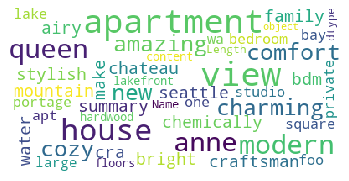

In [57]:
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(listing['content']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)


In [143]:
columns2 = ['downtown_room_with_kitchen', 'heart_of_seattle_apartment', 'fun_area_with_bars','university_area','shared_room_for_young','airport_and_light rail_access','private_place_with_parking_in_west_seattle','private_apartment_in_fremont/ballard','tech_hub_area','columbia_city_near_light_rail']

<BarContainer object of 10 artists>

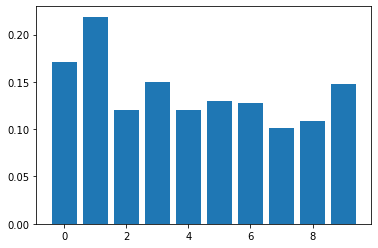

In [49]:
plt.bar(np.arange(10),np.mean(doc_topic, axis=0))


In [116]:
Vt = pd.DataFrame(doc_topic.round(5),
            index = listing['content'],
             columns = ["component_1","component_2",'component_3','component_4','component_5','component_6','component_7','component_8','component_9','component_10'])
Vt

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
content,,,,,,,,,,
"stylish queen anne apartment,no summary,make your self at home in this charming one bedroom apartment centrally located on the west side of queen anne hill this elegantly decorated completely private apartment bottom unit of a duplex has an open floor plan bamboo floors a fully equipped kitchen a tv dvd player basic cable and a very cozy bedroom with a queen size bed the unit sleeps up to four two in the bedroom and two on the very comfortable fold out couch linens included and includes free wifi and laundry the apartment opens onto a private deck complete with it s own bbq overlooking a garden and a forest of black bamboo the apartment is perfectly located just one block from the bus lines where you can catch a bus and be downtown seattle in fifteen minutes or historic ballard in ten or a quick five minute walk will bring you to whole foods and peet s coffee or take a fifteen minute walk to the top of queen anne hill where you will find a variety of eclectic shops bars and restaurants there is no,make your self at home in this charming one bedroom apartment centrally located on the west side of queen anne hill this elegantly decorated completely private apartment bottom unit of a duplex has an open floor plan bamboo floors a fully equipped kitchen a tv dvd player basic cable and a very cozy bedroom with a queen size bed the unit sleeps up to four two in the bedroom and two on the very comfortable fold out couch linens included and includes free wifi and laundry the apartment opens onto a private deck complete with it s own bbq overlooking a garden and a forest of black bamboo the apartment is perfectly located just one block from the bus lines where you can catch a bus and be downtown seattle in fifteen minutes or historic ballard in ten or a quick five minute walk will bring you to whole foods and peet s coffee or take a fifteen minute walk to the top of queen anne hill where you will find a variety of eclectic shops bars and restaurants there is no,no description,no description,no description",0.46518,0.14349,-0.00305,-0.04789,0.05745,0.12068,0.00998,0.00364,0.10391,-0.07410
"bright airy queen anne apartment,chemically sensitive we ve removed the irritants triggering allergy or asthma attacks like carpeting forced air used pillows all culprits that harbor fungus mold bacteria no smoking no pets designed for healthy living so breathe easy ,beautiful hypoallergenic apartment in an extremely safe quiet and pedestrian friendly section of queen anne a leafy green location that puts the best of seattle at your doorstep free wifi free parking even free pillows what s special about this place hypo allergenic bedding mattresses covers and new pillows with each rental so feel free to take your new pillows with you a beautiful restoration mixing period details modern sensibilities hardwood floors throughout white subway tile low no vocs non toxic paints keep this home away from home clean smart and healthy radiant heat and oil radiators mean no blowing hot air or dust great amenities free wifi internet tv led flatscreen fully equipped kitchen with stainless steel appliances sink disposal large washer dryer iron ironing board hairdryer plenty of storage convenient parking both on and off street the best location enjoy seattle s celebrated macrina bakery neighborhood cafes boutiqu,chemically sensitive we ve removed the irritants triggering allergy or asthma attacks like carpeting forced air used pillows all culprits that harbor fungus mold bacteria no smoking no pets designed for healthy living so breathe easy beautiful hypoallergenic apartment in an extremely safe quiet and pedestrian friendly section of queen anne a leafy green location that puts the best of seattle at your doorstep free wifi free parking even free pillows what s special about this place hypo allergenic bedding mattresses covers 

In [98]:
Vt = Vt.reset_index()

In [110]:
comp_list = []
for row in Vt['content']:
    comp_list.append(Vt[["component_1","component_2",'component_3','component_4','component_5','component_6','component_7','component_8','component_9','component_10']])